# Classification models Study

**Let's use some classification models to analyse a dataframe and see how good each one performs**

In [72]:
#First, let's import some libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('ticks') # Here I just setup a style to our graphics

### We will use in this study a dataframe with Universities data and try to segregate them into two catogories: Private and Public

First, we need to upload to our drive using the google.colab library

Them we can get our dataframe into the ***df*** variable

In [3]:
from google.colab import files  # Library used to upload or data to google colab
uploaded = files.upload()

Saving College_Data to College_Data


In [4]:
arquivo = 'College_Data'
df = pd.read_csv(arquivo, index_col = 0)
df.head() # Using '.head' we can see the dataframe first 5 rows

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Feature name explanation

**Private:** Yes or No to indicate if the university is Private

**Apps:** Number of applications received

**Accept:** Number of applications accepted

**Enroll:** Number of students enrolled

**Top10perc:** Percentage of new students coming from the group of 10% better in high school

**Top25perc:** Percentage of new students coming from the group of 25% better in high school

**F.Undergrad:** Number of full-time undergraduate students

**P.Undergrad:** Number of part-time undergraduate students

**Outstate:** Out-of-state classes

**Room.Board:** Room costs

**Books:** Estimated book costs

**Personal:** Estimated spending per person

**PhD:** Percentage of PHD's at the university

**Terminal:** Percentage of college with graduation

**S.F.Ratio:** Student / College Fee

**perc.alumni:** Percentage of alumni who donate

**Expend:** Institution expenses per student

**Grad.Rate:** Graduation rate

In [ ]:
# To see the dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [ ]:
# Just another way to verify the number of null/missing values

df.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [ ]:
# Statistical analysis of our data

df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [5]:
# Now We will transform the target feature "Private" in a categorical type

df.Private = df.Private.astype('category')

In [6]:
# Let's transform ou categorical column "Private" in rows with 0 or 1
# The get_dummies will create new columns (but We just need one in this case)
# The new column called Private_Yes receive 1 if is True and 0 if False (not private)

data = pd.get_dummies(data = df, columns = ['Private'], drop_first=True) # drop_first will delete the first get_dummies column

In [7]:
# Let's have a look of our new dataset
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [8]:
# We can rename this new column:

data.rename(columns = {'Private_Yes':'Private'}, inplace = True)

In [9]:
# We can see the correlation between the features with our target ("Private")

data.corr()['Private'].sort_values(ascending = False) # sort_values ordenate the values from the highest to lowest

Private        1.000000
Outstate       0.552650
perc.alumni    0.414775
Room.Board     0.340532
Grad.Rate      0.336162
Expend         0.258461
Top10perc      0.164132
Top25perc      0.095752
Books         -0.018549
Terminal      -0.129620
PhD           -0.156714
Personal      -0.304485
Apps          -0.432095
P.Undergrad   -0.452088
S.F.Ratio     -0.472205
Accept        -0.475252
Enroll        -0.567908
F.Undergrad   -0.615561
Name: Private, dtype: float64

## Scaling our data

**Sometimes is good to scale our data to avoid the model to understand that one feature is more important than other just beacause have a higher number**


In [10]:
# Here, using the StandardScaler we can create a new dataframe with scaled values

from sklearn.preprocessing import StandardScaler
data_to_scaler = data.drop('Private', axis = 1) # We don't need to scale our target
scaled = StandardScaler()
scaled.fit(data_to_scaler)
df_new = scaled.transform(data_to_scaler)
type(df_new)

numpy.ndarray

In [11]:
# From the StandardScaler we receive a numpy.ndarray but we need a pandas DataFrame
# Let's transform it into a dataframe

dataset = pd.DataFrame(df_new,columns = data.columns[:17])
dataset.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [12]:
# We can now separate the values for X (Features) and Y (target)
X = dataset
y = data['Private']

In [13]:
# By the end, we can split our data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Validation metrics

**We will use the classification report and the confusion matrix to see each model is better for our problem**

In [15]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [73]:
# Let's create a function that return the metric results of the modelificador

def report_model(modelo):
    modelo.fit(X_train,y_train)
    pred = modelo.predict(X_test)
    print('Classification Report: \n',classification_report(y_test,pred))
    
    plot_confusion_matrix(modelo,X_test,y_test, cmap=plt.cm.Blues,values_format= '.4g') #plotting the confusion matrix
    plt.title('Confusion Matrix \n',fontsize = 20)
    plt.xlabel('Predicted Label',fontsize = 15)
    plt.ylabel('True Label', fontsize = 15)

# Creating the classification models

**Let's try only five models**

***NOTE:***

**I'll not set any parameter inside the model, We will test the standard model**

*Some of the models must receive some parameters to avoid errors or/and warnings*

In [79]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## SVC - Support Vectores Classifier

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data provided, returning a "best fit" hyperplane that divides, or categorizes, your data.

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        62
           1       0.97      0.98      0.98       172

    accuracy                           0.97       234
   macro avg       0.96      0.95      0.96       234
weighted avg       0.97      0.97      0.97       234



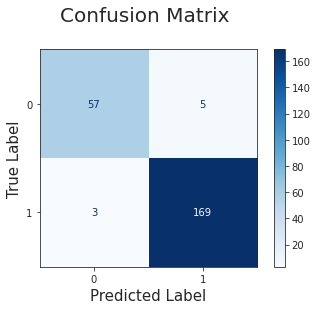

In [74]:
svc = SVC(gamma = 'scale')
report_model(svc)

## KNeighborsClassifier

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        62
           1       0.98      0.96      0.97       172

    accuracy                           0.95       234
   macro avg       0.93      0.95      0.94       234
weighted avg       0.95      0.95      0.95       234



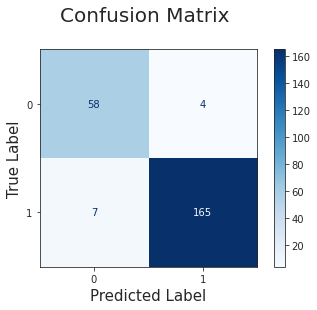

In [76]:
knc = KNeighborsClassifier()
report_model(knc)

## DecisionTreeClassifier

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.89      0.80        62
           1       0.96      0.88      0.92       172

    accuracy                           0.88       234
   macro avg       0.84      0.89      0.86       234
weighted avg       0.90      0.88      0.89       234



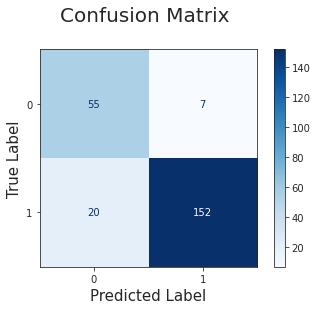

In [77]:
dtc = DecisionTreeClassifier()
report_model(dtc)

## RandomForestClassifier

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        62
           1       0.97      0.95      0.96       172

    accuracy                           0.94       234
   macro avg       0.92      0.94      0.93       234
weighted avg       0.95      0.94      0.94       234



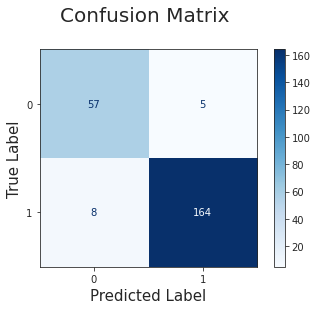

In [78]:
rfc = RandomForestClassifier(n_estimators = 10)
report_model(rfc)

# Conclusion
#### There is a high number of classifiers that We could use for this problem, each one with pros and cons that we must consider to apply.
#### All the models used here didn't had the hyperparameters improved, what could reflect in the final results.
#### A tip here is try to use a GridSearchCV to test some hyperparameters to find the best combination and them avaliate the best model.